<a href="https://colab.research.google.com/github/mkaushik-21/ILdata/blob/master/Random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload data and packages

In [1]:
from google.colab import files
uploaded = files.upload()

Saving IL solubilities database .xlsx to IL solubilities database .xlsx


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

In [3]:
import io
df= pd.read_excel(io.BytesIO(uploaded['IL solubilities database .xlsx']))
df

,IL,cation,anion,x_CO2,T (K),P (bar),[CH3],[CH2],[CH],[OCH2],[OCH3],[CF2],[CF3],[OH],CH=CH,CH=CH2,[Im13],[MIm],[MMIM],[Py],[MPy],[MPyrro],[MPip],[NH3],[NH2],[NH],[N],[P],[S],[BF4],[Cl],[DCA],[NO3],[PF6],[SCN],[TCB],[C(CN)3],[HSO4],[FSA],[Tf2N],[BETA],[FOR],[TFA],[C3F7CO2],[MeSO4],[EtSO4],[MDEGSO4],[MeSO3],[TfO],[NfO],[TDfO],[TOS],[C12PhSO3],[DMPO4],[DEPO4],[DBPO4],[methide]
0,[BMIM][BF4],[BMIM],[BF4],0.610,363.15,246.00,1,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,[BMIM][BF4],[BMIM],[BF4],0.500,383.15,235.00,1,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,[BMIM][BF4],[BMIM],[BF4],0.610,353.15,223.30,1,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,[BMIM][BF4],[BMIM],[BF4],0.500,373.15,198.00,1,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,[BMIM][BF4],[BMIM],[BF4],0.610,343.15,188.50,1,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10111,[HMIM][Tf2N],[HMIM],[Tf2N],0.592,298.15,35.86,1,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10112,[HMIM][Tf2N],[HMIM],[Tf2N],0.239,343.15,27.54,1,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10113,[HMIM][Tf2N],[HMIM],[Tf2N],0.396,298.15,20.15,1,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10114,[HMIM][Tf2N],[HMIM],[Tf2N],0.140,343.15,17.93,1,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
df.columns

Index(['IL', 'cation', 'anion', 'x_CO2', 'T (K)', 'P (bar)', '[CH3]', '[CH2]',
       '[CH]', '[OCH2]', '[OCH3]', '[CF2]', '[CF3]', '[OH]', 'CH=CH', 'CH=CH2',
       '[Im13]', '[MIm]', '[MMIM]', '[Py]', '[MPy]', '[MPyrro]', '[MPip]',
       '[NH3]', '[NH2]', '[NH]', '[N]', '[P]', '[S]', '[BF4]', '[Cl]', '[DCA]',
       '[NO3]', '[PF6]', '[SCN]', '[TCB]', '[C(CN)3]', '[HSO4]', '[FSA]',
       '[Tf2N]', '[BETA]', '[FOR]', '[TFA]', '[C3F7CO2]', '[MeSO4]', '[EtSO4]',
       '[MDEGSO4]', '[MeSO3]', '[TfO]', '[NfO]', '[TDfO]', '[TOS]',
       '[C12PhSO3]', '[DMPO4]', '[DEPO4]', '[DBPO4]', '[methide]'],
      dtype='object')

Rename group contributions as G1, G2... Gn

In [5]:
pdf = df.rename(columns={'[CH3]': 'G1', '[CH2]': 'G2', '[CH]': 'G3', '[OCH2]': 'G4', '[OCH3]': 'G5','[CF2]': 'G6', '[CF3]': 'G7', '[OH]': 'G8', 'CH=CH': 'G9', 'CH=CH2': 'G10',
       '[Im13]': 'G11', '[MIm]': 'G12', '[MMIM]': 'G13', '[Py]': 'G14', '[MPy]': 'G15', '[MPyrro]': 'G16', '[MPip]': 'G17',
       '[NH3]': 'G18', '[NH2]': 'G19', '[NH]': 'G20', '[N]': 'G21', '[P]': 'G22', '[S]': 'G23', '[BF4]': 'G24', '[Cl]': 'G25', '[DCA]': 'G26',
       '[NO3]': 'G27', '[PF6]': 'G28', '[SCN]': 'G29', '[TCB]': 'G30', '[C(CN)3]': 'G31', '[HSO4]': 'G32', '[FSA]': 'G33',
       '[Tf2N]': 'G34', '[BETA]': 'G35', '[FOR]': 'G36', '[TFA]': 'G37', '[C3F7CO2]': 'G38', '[MeSO4]': 'G39', '[EtSO4]': 'G40',
       '[MDEGSO4]': 'G41', '[MeSO3]': 'G42', '[TfO]': 'G43', '[NfO]': 'G44', '[TDfO]': 'G45', '[TOS]': 'G46',
       '[C12PhSO3]': 'G47', '[DMPO4]': 'G48', '[DEPO4]': 'G49', '[DBPO4]': 'G50', '[methide]': 'G51' })

In [6]:
pdf.head

<bound method NDFrame.head of                  IL  cation   anion  x_CO2   T (K)  ...  G47  G48  G49  G50  G51
0       [BMIM][BF4]  [BMIM]   [BF4]  0.610  363.15  ...    0    0    0    0    0
1       [BMIM][BF4]  [BMIM]   [BF4]  0.500  383.15  ...    0    0    0    0    0
2       [BMIM][BF4]  [BMIM]   [BF4]  0.610  353.15  ...    0    0    0    0    0
3       [BMIM][BF4]  [BMIM]   [BF4]  0.500  373.15  ...    0    0    0    0    0
4       [BMIM][BF4]  [BMIM]   [BF4]  0.610  343.15  ...    0    0    0    0    0
...             ...     ...     ...    ...     ...  ...  ...  ...  ...  ...  ...
10111  [HMIM][Tf2N]  [HMIM]  [Tf2N]  0.592  298.15  ...    0    0    0    0    0
10112  [HMIM][Tf2N]  [HMIM]  [Tf2N]  0.239  343.15  ...    0    0    0    0    0
10113  [HMIM][Tf2N]  [HMIM]  [Tf2N]  0.396  298.15  ...    0    0    0    0    0
10114  [HMIM][Tf2N]  [HMIM]  [Tf2N]  0.140  343.15  ...    0    0    0    0    0
10115  [HMIM][Tf2N]  [HMIM]  [Tf2N]  0.139  323.15  ...    0    0    0    0    

Separate data into X and y (input and output)

In [7]:
pdf.shape

(10116, 57)

In [8]:
X= pdf[['T (K)', 'P (bar)', 'G1', 'G2', 'G3',
       'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12', 'G13', 'G14',
       'G15', 'G16', 'G17', 'G18', 'G19', 'G20', 'G21', 'G22', 'G23', 'G24',
       'G25', 'G26', 'G27', 'G28', 'G29', 'G30', 'G31', 'G32', 'G33', 'G34',
       'G35', 'G36', 'G37', 'G38', 'G39', 'G40', 'G41', 'G42', 'G43', 'G44',
       'G45', 'G46', 'G47', 'G48', 'G49', 'G50', 'G51']]

In [9]:
y=df[['x_CO2']]

In [10]:
import pandas as pd
import numpy as np

In [11]:
X

,T (K),P (bar),G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,G13,G14,G15,G16,G17,G18,G19,G20,G21,G22,G23,G24,G25,G26,G27,G28,G29,G30,G31,G32,G33,G34,G35,G36,G37,G38,G39,G40,G41,G42,G43,G44,G45,G46,G47,G48,G49,G50,G51
0,363.15,246.00,1,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,383.15,235.00,1,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,353.15,223.30,1,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,373.15,198.00,1,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,343.15,188.50,1,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10111,298.15,35.86,1,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10112,343.15,27.54,1,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10113,298.15,20.15,1,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10114,343.15,17.93,1,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
y

,x_CO2
0,0.610
1,0.500
2,0.610
3,0.500
4,0.610
...,...
10111,0.592
10112,0.239
10113,0.396
10114,0.140


Train and test split on data

In [13]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=0)

Scale data based on the X values

In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X1_train = sc.fit_transform(X1_train)
X1_test = sc.transform(X1_test)

Create the random forest regression model. I used a large number of trees because of the size of the data, I wanted to make sure all data was factored in.

In [15]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=10000, random_state=0)
regressor.fit(X1_train, y1_train)
y1_pred = regressor.predict(X1_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Evaluation metrics 

In [16]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, y1_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, y1_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))
print("R2-score: %.2f" % r2_score(y1_test , y1_pred) )

Mean Absolute Error: 0.02097472231731376
Mean Squared Error: 0.0010989280790708888
Root Mean Squared Error: 0.033150084148775384
R2-score: 0.98


Create a parity figure

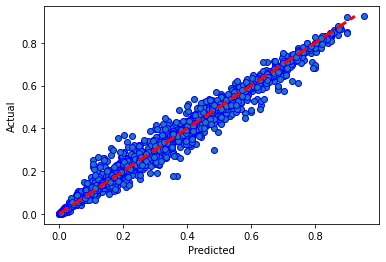

In [17]:
fig, ax = plt.subplots()
ax.scatter(y1_test,y1_pred, edgecolors=(0, 0, 1))
ax.plot([y1_pred.min(), y1_pred.max()], [y1_pred.min(), y1_pred.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

Determine which features are most important for solubility

Feature: 0, Score: 0.09199
Feature: 1, Score: 0.74909
Feature: 2, Score: 0.00625
Feature: 3, Score: 0.03108
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00010
Feature: 6, Score: 0.00007
Feature: 7, Score: 0.00016
Feature: 8, Score: 0.00013
Feature: 9, Score: 0.00530
Feature: 10, Score: 0.00001
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00004
Feature: 13, Score: 0.00192
Feature: 14, Score: 0.00002
Feature: 15, Score: 0.00006
Feature: 16, Score: 0.00001
Feature: 17, Score: 0.00121
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00075
Feature: 20, Score: 0.00015
Feature: 21, Score: 0.00634
Feature: 22, Score: 0.00027
Feature: 23, Score: 0.00115
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00153
Feature: 26, Score: 0.00423
Feature: 27, Score: 0.00053
Feature: 28, Score: 0.00097
Feature: 29, Score: 0.00078
Feature: 30, Score: 0.00489
Feature: 31, Score: 0.00075
Feature: 32, Score: 0.00162
Feature: 33, Score: 0.00016
Feature: 34, Score: 0.00011
Feature: 35, Score: 0.07284
Fe

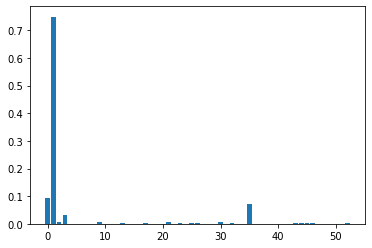

In [18]:
# get importance
importance = regressor.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Most important features are 1, 0, 35, and 3 which are P(bar), T(K), G33, and G2

In [19]:
importance

array([9.19934669e-02, 7.49088629e-01, 6.24874569e-03, 3.10800841e-02,
       2.11167607e-06, 1.01828221e-04, 7.32575624e-05, 1.64142147e-04,
       1.30538821e-04, 5.30479927e-03, 1.14427776e-05, 1.55143492e-06,
       4.41239467e-05, 1.91913681e-03, 2.35899486e-05, 5.70016419e-05,
       9.14339108e-06, 1.21165624e-03, 2.23344202e-06, 7.46152422e-04,
       1.46007496e-04, 6.33935087e-03, 2.66027234e-04, 1.15332856e-03,
       1.07002135e-06, 1.53041427e-03, 4.23242618e-03, 5.25698259e-04,
       9.65315166e-04, 7.79214662e-04, 4.89014187e-03, 7.50507299e-04,
       1.62128070e-03, 1.56345227e-04, 1.08267499e-04, 7.28447038e-02,
       2.00698219e-04, 5.97887405e-04, 5.78783031e-04, 1.28584726e-04,
       1.04353828e-03, 3.02690139e-04, 4.49552684e-04, 2.21617028e-03,
       2.48145941e-03, 2.34193932e-03, 3.69805195e-03, 8.45769595e-06,
       1.79205829e-04, 1.21757874e-07, 1.31760718e-04, 9.29867143e-07,
       1.11643403e-03])

Create a pd dataframe out of importance array so x-axis can be altered


In [21]:
graph= pd.DataFrame(importance)
graph.columns = ['importance']
graph.index= ['T (K)', 'P (bar)', 'G1', 'G2', 'G3',
       'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12', 'G13', 'G14',
       'G15', 'G16', 'G17', 'G18', 'G19', 'G20', 'G21', 'G22', 'G23', 'G24',
       'G25', 'G26', 'G27', 'G28', 'G29', 'G30', 'G31', 'G32', 'G33', 'G34',
       'G35', 'G36', 'G37', 'G38', 'G39', 'G40', 'G41', 'G42', 'G43', 'G44',
       'G45', 'G46', 'G47', 'G48', 'G49', 'G50', 'G51']
graph.drop(['T (K)', 'P (bar)'])
graph

,importance
T (K),9.199347e-02
P (bar),7.490886e-01
G1,6.248746e-03
G2,3.108008e-02
G3,2.111676e-06
G4,1.018282e-04
G5,7.325756e-05
G6,1.641421e-04
G7,1.305388e-04
G8,5.304799e-03


In [22]:
graph.columns = ['importance']
graph.index= ['T (K)', 'P (bar)', 'G1', 'G2', 'G3',
       'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12', 'G13', 'G14',
       'G15', 'G16', 'G17', 'G18', 'G19', 'G20', 'G21', 'G22', 'G23', 'G24',
       'G25', 'G26', 'G27', 'G28', 'G29', 'G30', 'G31', 'G32', 'G33', 'G34',
       'G35', 'G36', 'G37', 'G38', 'G39', 'G40', 'G41', 'G42', 'G43', 'G44',
       'G45', 'G46', 'G47', 'G48', 'G49', 'G50', 'G51']
graph

,importance
T (K),9.199347e-02
P (bar),7.490886e-01
G1,6.248746e-03
G2,3.108008e-02
G3,2.111676e-06
G4,1.018282e-04
G5,7.325756e-05
G6,1.641421e-04
G7,1.305388e-04
G8,5.304799e-03


Make dataset that has all features except T and P

In [23]:
gra= graph.drop(['T (K)', 'P (bar)'])
gra

,importance
G1,6.248746e-03
G2,3.108008e-02
G3,2.111676e-06
G4,1.018282e-04
G5,7.325756e-05
G6,1.641421e-04
G7,1.305388e-04
G8,5.304799e-03
G9,1.144278e-05
G10,1.551435e-06


Graph all functional groups (excluding T and P)

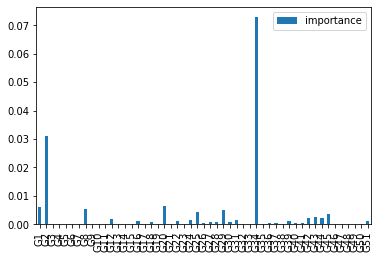

In [24]:
gra.plot.bar(y='importance', use_index=True)

Make dataset with only cations
Cations= G1-23 (excluding G8)

In [34]:
cation= gra.drop(['G8','G24','G25','G26','G27','G28','G29','G30','G31','G32','G33','G34','G35','G36','G37','G38','G39','G40','G41','G42','G43','G44','G45','G46','G47','G48','G49','G50','G51'])

In [35]:
cation

,importance
G1,0.006249
G2,0.031080
G3,0.000002
G4,0.000102
G5,0.000073
G6,0.000164
G7,0.000131
G9,0.000011
G10,0.000002
G11,0.000044


Graph only cations

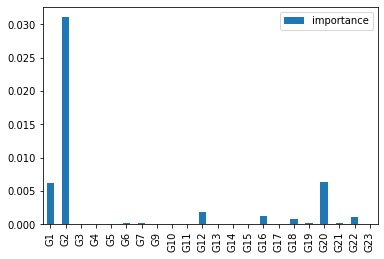

In [36]:
cation.plot.bar(y='importance', use_index=True)

Create dataset of only anions G8, G24-51

In [37]:
anion= gra.drop(['G1','G2','G3','G4','G5','G6','G7','G9','G10','G11','G12','G13','G14','G15','G16','G17','G18','G19','G20','G21','G22','G23'])

In [38]:
anion

,importance
G8,5.304799e-03
G24,1.530414e-03
G25,4.232426e-03
G26,5.256983e-04
G27,9.653152e-04
G28,7.792147e-04
G29,4.890142e-03
G30,7.505073e-04
G31,1.621281e-03
G32,1.563452e-04


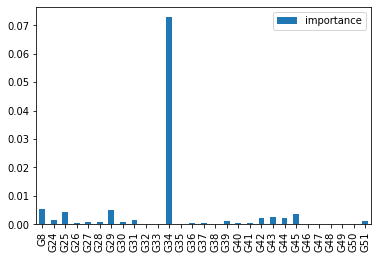

In [39]:
anion.plot.bar(y='importance', use_index=True)